# 05_OCV_traslacion

## Traslación de imagen con OpenCV

### Importar librerías

In [1]:
#!pip install imutils

In [2]:
# Importar los paquetes necesarios
from matplotlib import pyplot as plt
import numpy as np
import imutils
import cv2

### Función para mostrar imágenes en Jupyter Notebooks y Google Colab

In [3]:
def mostrar_imagen(titulo,imagen):
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  plt.imshow(imagen)
  plt.title(titulo)
  plt.grid(False)
  plt.show

### Image translation with OpenCV

In [4]:
args = { "image": "pinguino.jpg"}

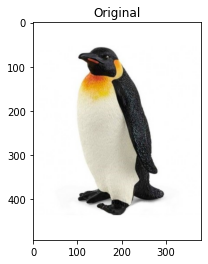

In [5]:
# cargar la imagen y mostrarla
image = cv2.imread(args["image"])
mostrar_imagen("Original", image)

In [6]:
image.shape

(492, 381, 3)

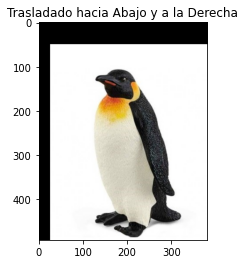

In [7]:
# trasladar la imagen 25 pixeles a la derecha y 50 pixeles hacia abajo

M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
mostrar_imagen("Trasladado hacia Abajo y a la Derecha", shifted)

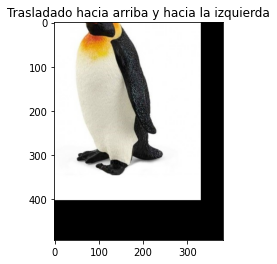

In [8]:
# ahora, trasladar la imagen 50 pixeles a la izquierda y 90 pixeles
# hacia arriba, usando valores negativos para las direcciones x e y
# respectivamente
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
mostrar_imagen("Trasladado hacia arriba y hacia la izquierda", shifted)

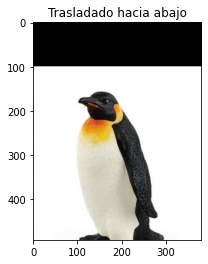

In [9]:
# uso de la función de ayuda de imutils para trasladar la imagen 100
# pixeles hacia abajo en una simple llamada de función
shifted = imutils.translate(image, 0, 100)
mostrar_imagen("Trasladado hacia abajo", shifted)

# 06_OCV_Rotacion

### Importar paquetes y librerias

In [10]:
import matplotlib.pyplot as plt
import imutils
import cv2

### Funcíón para mostrar una imagen con imshow() de pyplot

In [11]:
def mostrar_imagen(title, imagen):
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  plt.imshow(imagen)
  plt.title(title)
  plt.grid(False)
  plt.show()

### Implementación de la rotación con OpenCV

In [12]:
args = { "imagen" :"pinguino.jpg" }

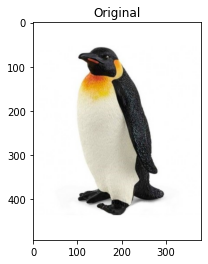

In [13]:
#Cargar la imagen y mostrarla
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

In [14]:
# Determinar el centro de la imagen y
# calcular el centro de la imagen
(h,w) = imagen.shape[0:2]
(cX, cY) = (w//2,h//2)

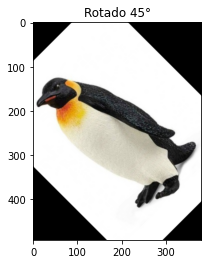

In [15]:
# rotar la imagen 45° alrededor del centro de la imagen
M = cv2.getRotationMatrix2D((cX,cY),45,1.0)
rotado = cv2.warpAffine(imagen,M,(w,h))
mostrar_imagen("Rotado 45°",rotado)

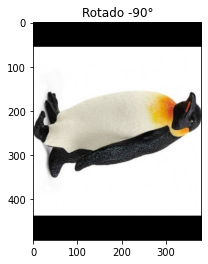

In [16]:
# rotar la imagen -90° alrededor del centro de la imagen
M = cv2.getRotationMatrix2D((cX,cY),-90,1.0)
rotado = cv2.warpAffine(imagen,M,(w,h))
mostrar_imagen("Rotado -90°",rotado)

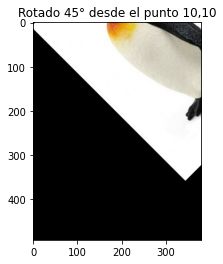

In [17]:
# rotar la imagen 45° alrededor de la coordenada x=10 y=10
M = cv2.getRotationMatrix2D((10,10),45,1.0)
rotado = cv2.warpAffine(imagen,M,(w,h))
mostrar_imagen("Rotado 45° desde el punto 10,10",rotado)

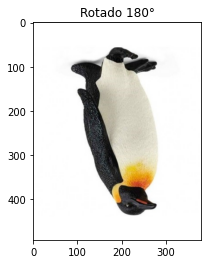

In [18]:
rotado = imutils.rotate(imagen,180)
mostrar_imagen("Rotado 180°",rotado)

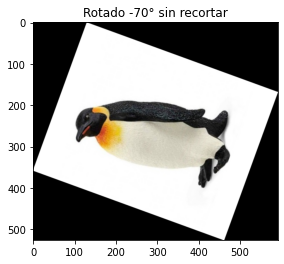

In [19]:
rotado = imutils.rotate_bound(imagen,-70)
mostrar_imagen("Rotado -70° sin recortar",rotado)

# 07_OCV_RedimensionarImagen

### Importar paquetes y librerias

In [20]:
import matplotlib.pyplot as plt
import imutils
import cv2

### Función para mostrar una imagen con imshow() de pyplot

In [21]:
def mostrar_imagen(title, imagen):
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)
    plt.title(title)
    plt.grid(False)
    plt.show()

### Implementación de redimensionamiento básico con OpenCV

In [22]:
args = { "imagen" :"ave.jpg" }

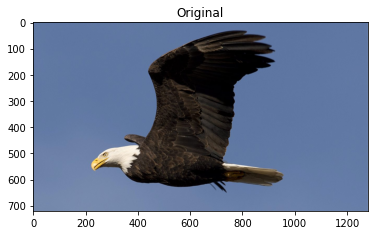

(720, 1280, 3)


In [23]:
#Cargar la imagen y mostrarla
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)
print(imagen.shape)

In [24]:
# Redimensionar la imagen para tener 700 px de ancho
# haciendo que la otra dimensión tenga un tamaño
# apropiado y no se distorsione 

#proporción de reducción de la imagen
r = 700.0/imagen.shape[1]

# nueva dimensión de la imagen
dim = (700, int(imagen.shape[0]*r))
print("Nueva dimension de la imagen")
print("Ancho:{}".format(dim[0]))
print("Alto:{}".format(dim[1]))

Nueva dimension de la imagen
Ancho:700
Alto:393


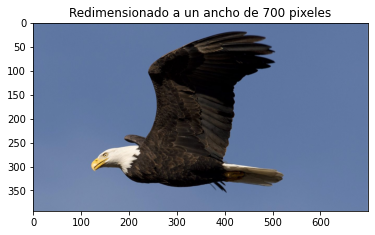

In [25]:
# redimensionar la imagen
redimensionado = cv2.resize(imagen,dim,cv2.INTER_AREA)
mostrar_imagen("Redimensionado a un ancho de 700 pixeles",redimensionado)

In [26]:
cv2.imwrite("aveRedimensionado.jpg",redimensionado)

True

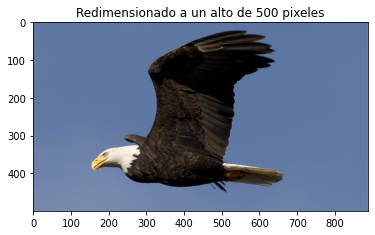

In [27]:
# redimensionamiento de la imagen a un alto de 500 pixeles
# manteniemdo la proporción de la imagen
r = 500.0/imagen.shape[0]

# nueva dimensión de la imagen
dim = (int(imagen.shape[1]*r),500)

# redimensionar la imagen
redimensionado = cv2.resize(imagen,dim,cv2.INTER_AREA)
mostrar_imagen("Redimensionado a un alto de 500 pixeles",redimensionado)

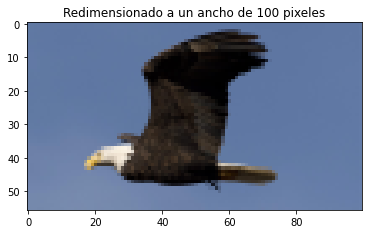

In [28]:
# redimensionando con imutils a un ancho de 100 pixeles
redimensionado = imutils.resize(imagen,width=100)
mostrar_imagen("Redimensionado a un ancho de 100 pixeles",redimensionado)

### Comparación de métodos de interpolación con OpenCV

In [29]:
metodos = [("cv2.INTER_NEAREST",cv2.INTER_NEAREST),
            ("cv2.INTER_LINEAR",cv2.INTER_LINEAR),
            ("cv2.INTER_AREA",cv2.INTER_AREA),
            ("cv2.INTER_CUBIC",cv2.INTER_CUBIC),
            ("cv2.INTER_LANCZOS4",cv2.INTER_LANCZOS4)]

Método:cv2.INTER_NEAREST


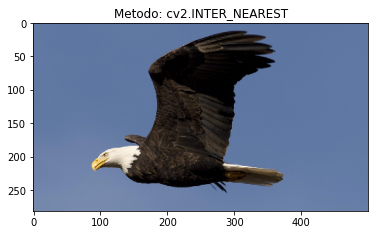

Método:cv2.INTER_LINEAR


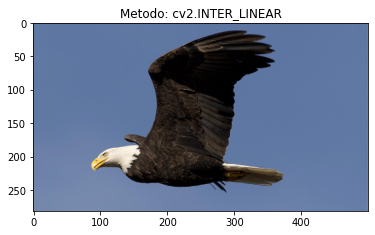

Método:cv2.INTER_AREA


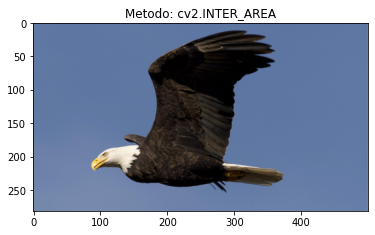

Método:cv2.INTER_CUBIC


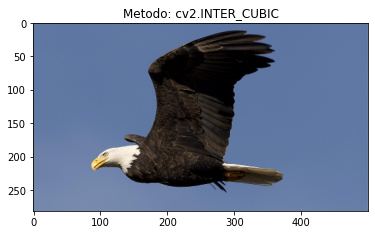

Método:cv2.INTER_LANCZOS4


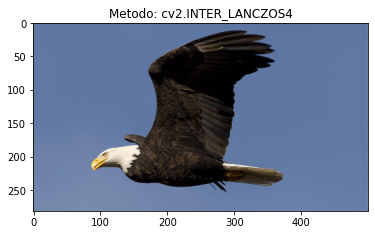

In [30]:
for (nombre,metodo) in metodos:
    print("Método:{}".format(nombre))
    redimensionado = imutils.resize(imagen,width=500,inter=metodo)
    mostrar_imagen("Metodo: {}".format(nombre),redimensionado)

# 08_OCV_VoltearImagen

### Importar paquetes y librerias

In [31]:
import matplotlib.pyplot as plt
import imutils
import cv2

### Función para mostrar una imagen con imshow() de pyplot

In [32]:
def mostrar_imagen(title, imagen):
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)
    plt.title(title)
    plt.grid(False)
    plt.show()

### Voltear imagenes con OpenCV

In [33]:
args = { "imagen" :"stich.png"}

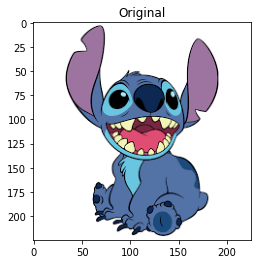

In [34]:
#Cargar la imagen y mostrarla
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

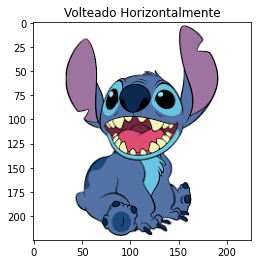

In [35]:
#voltear la imagen horizontalmente
volteado = cv2.flip(imagen,1)
mostrar_imagen("Volteado Horizontalmente",volteado)

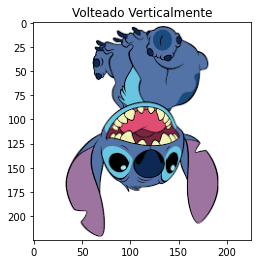

In [36]:
#voltear la imagen verticalmente
volteado = cv2.flip(imagen,0)
mostrar_imagen("Volteado Verticalmente",volteado)

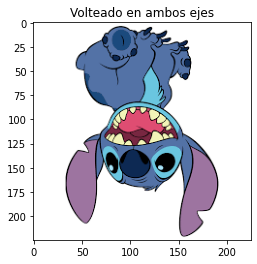

In [37]:
#voltear la imagen en ambos ejes
volteado = cv2.flip(imagen,-1)
mostrar_imagen("Volteado en ambos ejes",volteado)

# 09_OCV_RecortarImagenes

### Importar paquetes y librerias

In [38]:
import matplotlib.pyplot as plt
import imutils
import numpy as np
import cv2

### Función para mostrar una imagen con imshow() de pyplot

In [39]:
def mostrar_imagen(title, imagen):
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)
    plt.title(title)
    plt.grid(False)
    plt.show()

## Recortar imagenes con OpenCV y NumPy

### Ejemplo de uso de numpy

In [40]:
I = np.arange(0,25)
I

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [41]:
I = I.reshape((5,5))
I

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [42]:
I[3,2]

17

In [43]:
I[0:3,1:4]

array([[ 1,  2,  3],
       [ 6,  7,  8],
       [11, 12, 13]])

In [44]:
I[3:5,1:5]

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

### Recortar imágenes con OpenCV

In [45]:
args = { "imagen" :"ave.png" }

In [50]:
imagen.shape

(2480, 3508, 3)

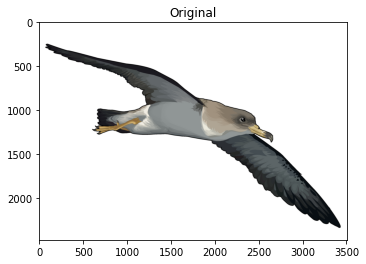

In [46]:
#Cargar la imagen y mostrarla
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

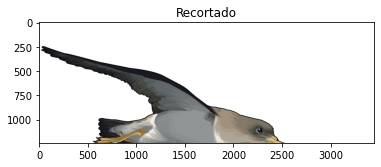

In [52]:
#Recortar la imagen con Numpy
# 0:1240 define parte del alto de la imagen
# 50:3500 define el ancho de la imagen
recortado = imagen[0:1240,50:3500]
mostrar_imagen("Recortado",recortado)

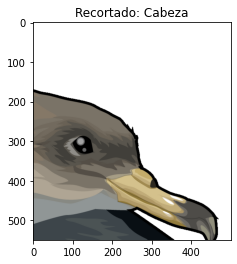

In [62]:
recortado = imagen[800:1350,2200:2700]

mostrar_imagen("Recortado: Cabeza",recortado)